In [1]:
import nltk

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [3]:
import pandas as pd

In [4]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
messages['Length'] = messages['message'].apply(len)

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: ylabel='Frequency'>

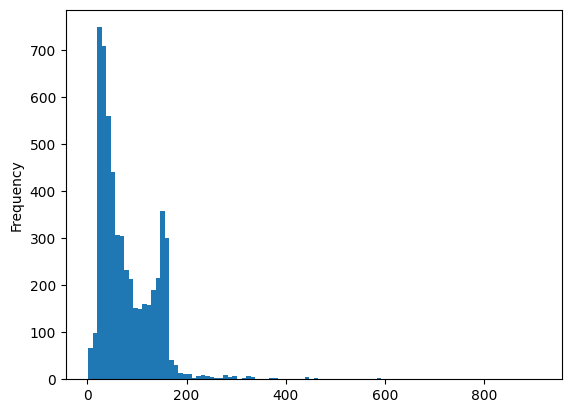

In [9]:
messages['Length'].plot.hist(bins = 100)

In [10]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
bow_trans = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [13]:
messages_bow = bow_trans.transform(messages['message'])

In [15]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
TFID = TfidfTransformer().fit(messages_bow)

In [19]:
messages_tfid = TFID.transform(messages_bow)

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
sdm = MultinomialNB().fit(messages_tfid, messages['label'])

In [22]:
all_pred = sdm.predict(messages_tfid)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(messages['message'], messages['label'], test_size=0.3)

In [26]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfid', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [28]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000013F1B054F40>)),
                ('tfid', TfidfTransformer()), ('classifier', MultinomialNB())])

In [29]:
pred = pipeline.predict(x_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1445
        spam       1.00      0.72      0.84       227

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.96      0.96      0.96      1672

